In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

In [6]:
df = pd.read_csv("D:\Data Science basics\Datasets\mydata.csv", header = None)
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [7]:
df.columns = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors",
"body-style", "drive-wheels", "engine-location", "wheel-base", "length", "width", "height",
"curb-weight", "engine-type", "num-of-cylinders", "engine-size", "fuel-system", "bore",
"stroke", "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"]

In [8]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [9]:
df.to_csv("D:\Data Science basics\Datasets\mydata-automobile.csv")

In [10]:
df.dtypes
df.describe(include = "all")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [11]:
df1 = df.replace('?', np.NaN)

In [12]:
print(df.columns)

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')


In [13]:
df1[['make', 'length', 'width']].describe()

,length,width
count,205.000000,205.000000
mean,174.049268,65.907805
std,12.337289,2.145204
min,141.100000,60.300000
25%,166.300000,64.100000
50%,173.200000,65.500000
75%,183.100000,66.900000
max,208.100000,72.300000


In [14]:
df1['length']
#df1['length']+=1      to perform arith ops on the data

0      168.8
1      168.8
2      171.2
3      176.6
4      176.6
       ...  
200    188.8
201    188.8
202    188.8
203    188.8
204    188.8
Name: length, Length: 205, dtype: float64

In [15]:
missing_data = df1.isnull()
missing_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [16]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

symboling
symboling
False    205
Name: count, dtype: int64

normalized-losses
normalized-losses
False    164
True      41
Name: count, dtype: int64

make
make
False    205
Name: count, dtype: int64

fuel-type
fuel-type
False    205
Name: count, dtype: int64

aspiration
aspiration
False    205
Name: count, dtype: int64

num-of-doors
num-of-doors
False    203
True       2
Name: count, dtype: int64

body-style
body-style
False    205
Name: count, dtype: int64

drive-wheels
drive-wheels
False    205
Name: count, dtype: int64

engine-location
engine-location
False    205
Name: count, dtype: int64

wheel-base
wheel-base
False    205
Name: count, dtype: int64

length
length
False    205
Name: count, dtype: int64

width
width
False    205
Name: count, dtype: int64

height
height
False    205
Name: count, dtype: int64

curb-weight
curb-weight
False    205
Name: count, dtype: int64

engine-type
engine-type
False    205
Name: count, dtype: int64

num-of-cylinders
num-of-cylinders
False    205
Nam

In [17]:
avg_norm_loss = df1['normalized-losses'].astype('float').mean()
print("Average of Normalised Loss: ", avg_norm_loss)

Average of Normalised Loss:  122.0


In [18]:
df1['normalized-losses'].replace(np.nan, avg_norm_loss, inplace = True)
df1

C:\Users\Harivenkat\AppData\Local\Temp\ipykernel_11408\1179275778.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['normalized-losses'].replace(np.nan, avg_norm_loss, inplace = True)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [19]:
avg_bore = df1['bore'].astype('float').mean()
print("Average of Bore: ", avg_bore)

Average of Bore:  3.3297512437810943


In [20]:
df1['bore'].replace(np.nan, avg_bore, inplace = True)
df1['bore']

C:\Users\Harivenkat\AppData\Local\Temp\ipykernel_11408\695238097.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['bore'].replace(np.nan, avg_bore, inplace = True)


0      3.47
1      3.47
2      2.68
3      3.19
4      3.19
       ... 
200    3.78
201    3.78
202    3.58
203    3.01
204    3.78
Name: bore, Length: 205, dtype: object

In [21]:
avg_stroke = df1['stroke'].astype('float').mean()
df1['stroke'].replace(np.nan, avg_stroke, inplace = True)

C:\Users\Harivenkat\AppData\Local\Temp\ipykernel_11408\3073914205.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['stroke'].replace(np.nan, avg_stroke, inplace = True)


In [22]:
avg_hp = df1['horsepower'].astype('float').mean()
df1['horsepower'].replace(np.nan, avg_hp, inplace = True)

C:\Users\Harivenkat\AppData\Local\Temp\ipykernel_11408\3495904435.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['horsepower'].replace(np.nan, avg_hp, inplace = True)


In [23]:
avg_price = df1['price'].astype('float').mean()
df1['price'].replace(np.nan, avg_price, inplace = True)

C:\Users\Harivenkat\AppData\Local\Temp\ipykernel_11408\1047322009.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['price'].replace(np.nan, avg_price, inplace = True)


In [24]:
avg_peak_rpm = df1['peak-rpm'].astype('float').mean()
df1['peak-rpm'].replace(np.nan, avg_peak_rpm, inplace = True)

C:\Users\Harivenkat\AppData\Local\Temp\ipykernel_11408\2050611487.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['peak-rpm'].replace(np.nan, avg_peak_rpm, inplace = True)


In [25]:
df1['stroke'].value_counts()
df1['stroke'].value_counts().idxmax()

df1['stroke'].replace('?', '3.40', inplace = True)

C:\Users\Harivenkat\AppData\Local\Temp\ipykernel_11408\2465481326.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['stroke'].replace('?', '3.40', inplace = True)


In [26]:
max_doors = df1['num-of-doors'].value_counts().idxmax()

In [27]:
df1['num-of-doors'].replace(np.nan, max_doors, inplace = True)

C:\Users\Harivenkat\AppData\Local\Temp\ipykernel_11408\1111363482.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['num-of-doors'].replace(np.nan, max_doors, inplace = True)


In [28]:
df1[["bore", "stroke"]] = df1[["bore", "stroke"]].astype("float")
df1[["normalized-losses"]] = df1[["normalized-losses"]].astype("int")
df1[["price"]] = df1[["price"]].astype("float")
df1[["peak-rpm"]] = df1[["peak-rpm"]].astype("float")

In [29]:
df1.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [30]:
df1['city-L/100km'] = 235/df1['city-mpg']
df1.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


Data Normalization

In [31]:
df1['length'] = df1['length']/ df1['length'].max()
df1['width'] = df1['width']/df1['width'].max()

In [32]:
df1["horsepower"]=df1["horsepower"].astype(int, copy=True)

Text(0.5, 1.0, 'horsepower bins')

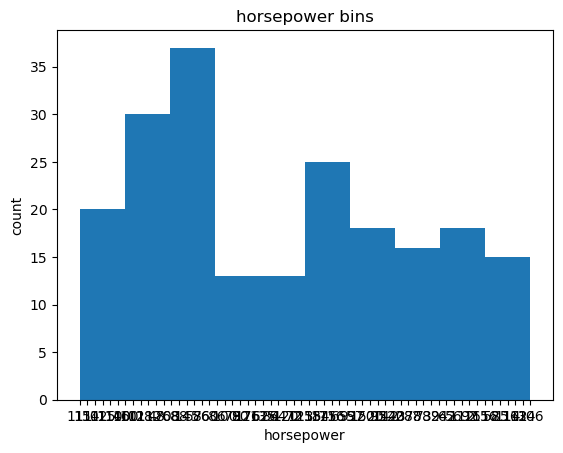

In [33]:
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Bins

In [34]:
bins = np.linspace(min(df1['horsepower']), max(df1['horsepower']), 4)
bins

array([ 48., 128., 208., 288.])

In [35]:
group_names = ['Low', 'Medium', 'High']

In [36]:
df1['horsepower-binned'] = pd.cut(df1['horsepower'], bins, labels= group_names, 
                                  include_lowest = True)
df1[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,160,Medium


In [37]:
df1['horsepower-binned'].value_counts()

horsepower-binned
Low       163
Medium     40
High        2
Name: count, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

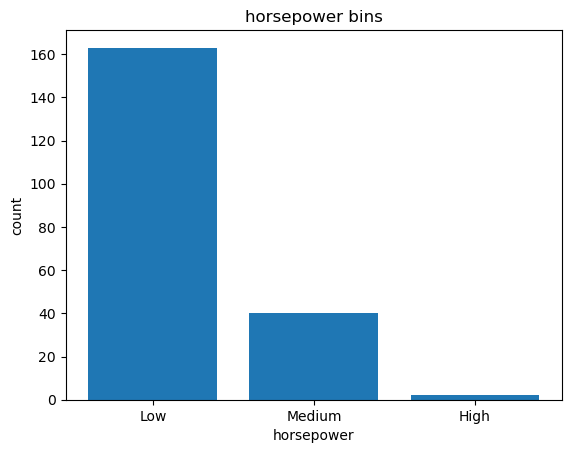

In [38]:
pyplot.bar(group_names, df1["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Text(0.5, 1.0, 'horsepower bins')

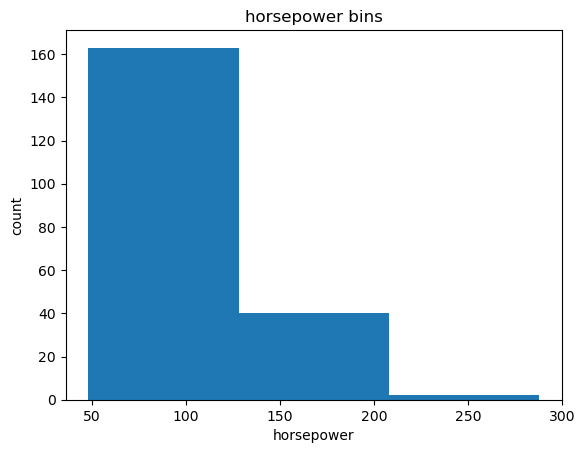

In [39]:
plt.pyplot.hist(df1["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [40]:
dummy_variable_1 = pd.get_dummies(df1["fuel-type"])
dummy_variable_1.head()

,diesel,gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


In [41]:
df1.to_csv("D:\Data Science basics\Datasets\mydata-automobile-cleaned.csv")

Descriptive Stats

In [42]:
drive_wheel_counts = df1['drive-wheels'].value_counts()

In [43]:
drive_wheel_counts.rename(columns = {'drive-wheels' : 'value_counts'}, inplace = True)
drive_wheel_counts.index.name = 'drive-wheels'

TypeError: rename() got an unexpected keyword argument 'columns'

Text(0, 0.5, 'Price')

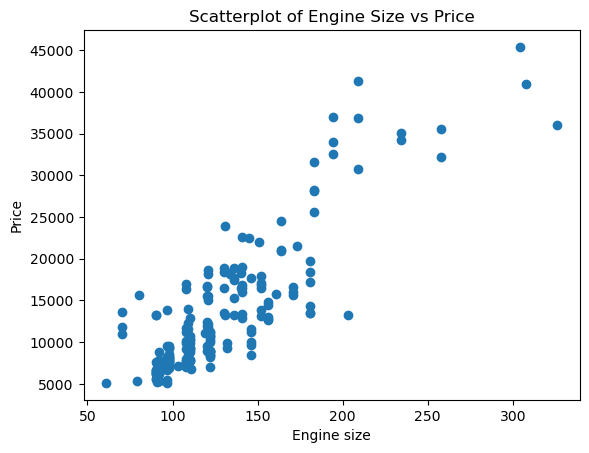

In [44]:
import matplotlib.pyplot as plt

x = df1['engine-size']
y = df1['price']
plt.scatter(x, y)
plt.title("Scatterplot of Engine Size vs Price")
plt.xlabel("Engine size")
plt.ylabel("Price")

<Axes: xlabel='drive-wheels', ylabel='price'>

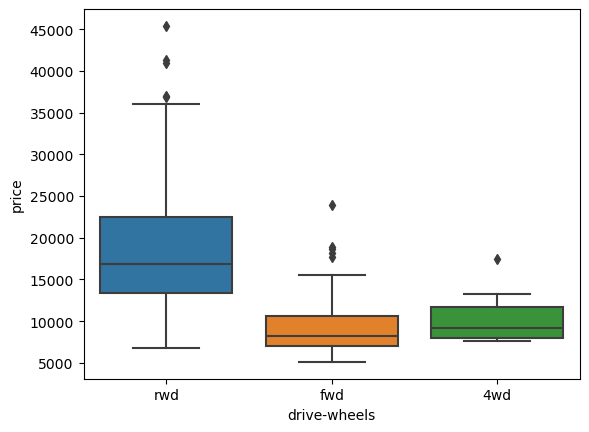

In [45]:
import seaborn as sns

sns.boxplot(x = "drive-wheels", y = "price", data = df1)

In [46]:
df_test = df1[['drive-wheels', 'body-style', 'price']]
df_grp = df_test.groupby(['drive-wheels', 'body-style'], as_index = False).mean()
df_grp

,drive-wheels,body-style,price
0,4wd,hatchback,10405.064677
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9930.934363
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [47]:
df_pivot = df_grp.pivot(index = 'drive-wheels', columns = 'body-style')
df_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN  10405.064677  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9930.934363   
rwd              23949.6  24202.714286  14278.269966  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

C:\Users\Harivenkat\AppData\Local\Temp\ipykernel_11408\1039962715.py:2: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar()


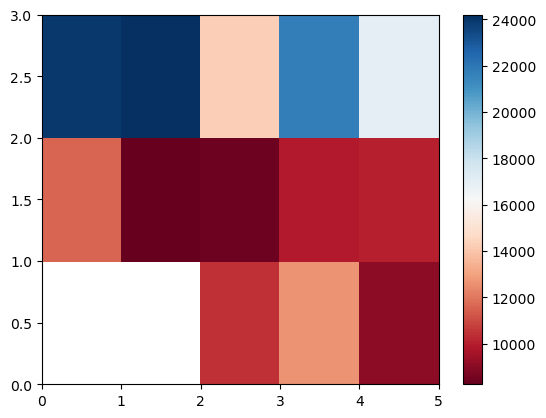

In [48]:
plt.pcolor(df_pivot, cmap = 'RdBu')
plt.colorbar()
plt.show()

In [49]:
df1['price'] = df1['price'].astype('int64')

ANalysis Of VAriance (ANOVA)

In [50]:
from scipy import stats
from scipy.stats import f_oneway

df1_anova = df[['make', 'price']]
grouped_anova = df1_anova.groupby(['make'])

In [51]:
anova_results_1 = stats.f_oneway(grouped_anova.get_group('honda') ['price'], 
                               grouped_anova.get_group('subaru') ['price'])

C:\Users\Harivenkat\AppData\Local\Temp\ipykernel_11408\3519146639.py:1: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  anova_results_1 = stats.f_oneway(grouped_anova.get_group('honda') ['price'],
C:\Users\Harivenkat\AppData\Local\Temp\ipykernel_11408\3519146639.py:2: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  grouped_anova.get_group('subaru') ['price'])


TypeError: unsupported operand type(s) for /: 'str' and 'int'

Correlation

(0.0, 52372.64563977754)

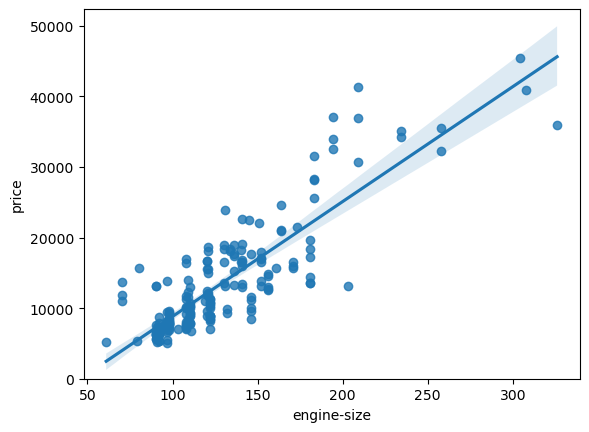

In [52]:
sns.regplot(x = 'engine-size', y = 'price', data = df1)
plt.ylim(0, )

(0.0, 48128.17576022932)

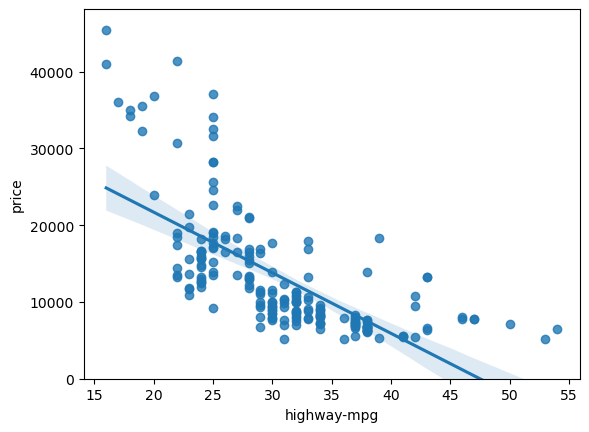

In [53]:
sns.regplot(x = 'highway-mpg', y = 'price', data = df1)
plt.ylim(0, )

(0.0, 47414.1)

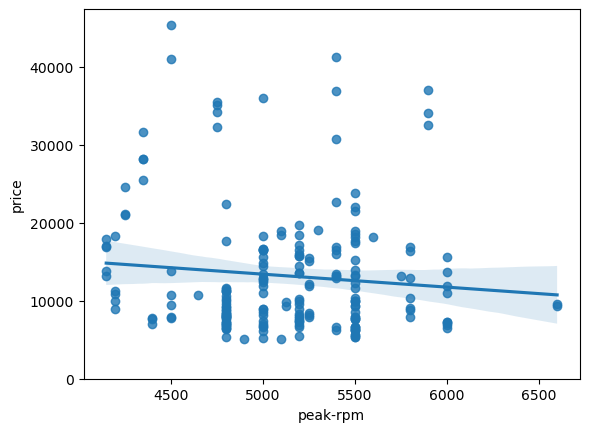

In [54]:
sns.regplot(x = 'peak-rpm', y = 'price', data = df1)
plt.ylim(0, )

In [55]:
pearson_coef, p_value = stats.pearsonr(df1['horsepower'], df1['price'])

In [56]:
print(pearson_coef)
print(p_value)

0.7579456217935242
1.591033244659585e-39


In [57]:
df1.dtypes

symboling               int64
normalized-losses       int32
make                   object
fuel-type              object
aspiration             object
num-of-doors           object
body-style             object
drive-wheels           object
engine-location        object
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type            object
num-of-cylinders       object
engine-size             int64
fuel-system            object
bore                  float64
stroke                float64
compression-ratio     float64
horsepower              int32
peak-rpm              float64
city-mpg                int64
highway-mpg             int64
price                   int64
city-L/100km          float64
horsepower-binned    category
dtype: object

In [59]:
df1['price'].head()

0    13495
1    16500
2    16500
3    13950
4    17450
Name: price, dtype: int64